In [1]:
# Import Pandas
import pandas as pd

# Setting dataset location
file_path = 'Dataset.csv'

# Read the CSV file and save as df (Dataframe)
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

# Display info of df
print(df.info())

                     id             dateAdded           dateUpdated  \
0  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
1  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
2  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
3  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
4  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   

                                                name                  asins  \
0  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
1  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
2  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
3  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
4  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   

          brand                                         categories  \
0  Amazonbasics  AA,AAA,Heal

In [2]:
# Filter df to only include ratings and text, save as new
df_filtered = df[['reviews.rating', 'reviews.text']]

# Display the first few rows of new
print(df_filtered.head())

   reviews.rating                                       reviews.text
0               3  I order 3 of them and one of the item is bad q...
1               4  Bulk is always the less expensive way to go fo...
2               5  Well they are not Duracell but for the price i...
3               5  Seem to work as well as name brand batteries a...
4               5  These batteries are very long lasting the pric...


In [47]:
# Import nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer and stopwords list using english
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Def preprocessing function to clean text
def preprocess_text(text):
    # Lowercasing, set to lowercase
    text = text.lower()
    
    # Removing punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing stop words and lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    # Return cleaned text
    return preprocessed_text

# Apply preprocessing to the reviews.text column
df_filtered['preprocessed_text'] = df_filtered['reviews.text'].apply(preprocess_text)

# Display the first few rows of the clean text
print(df_filtered.head())

   reviews.rating                                       reviews.text  \
1               4  Bulk is always the less expensive way to go fo...   
2               5  Well they are not Duracell but for the price i...   
3               5  Seem to work as well as name brand batteries a...   
4               5  These batteries are very long lasting the pric...   
5               5  Bought a lot of batteries for Christmas and th...   

                                   preprocessed_text  sentiment  
1       bulk always le expensive way go product like        1.0  
2                          well duracell price happy        1.0  
3  seem work well name brand battery much better ...        1.0  
4                   battery long lasting price great        1.0  
5  bought lot battery christmas amazonbasics cell...        1.0  


5    19897
4     5648
3     1206
1      965
2      616
Name: reviews.rating, dtype: int64


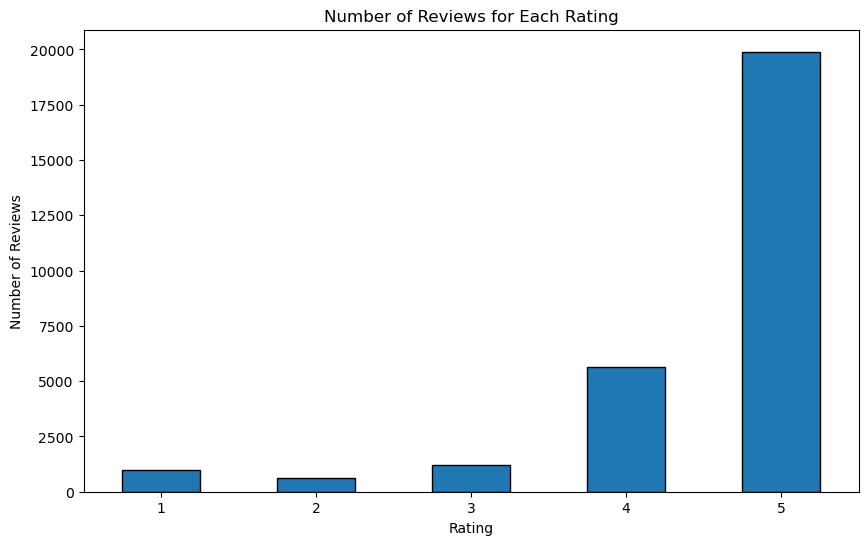

In [4]:
# Import Matplot to show review rating distribution
import matplotlib.pyplot as plt

# Count the instances of each rating
rating_counts = df_filtered['reviews.rating'].value_counts()

# Display the counts
print(rating_counts)

# Plot the counts
plt.figure(figsize=(10, 6))
rating_counts.sort_index().plot(kind='bar', edgecolor='black')
plt.title('Number of Reviews for Each Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

In [48]:
# Define a function to label the sentiment for better processing
def label_sentiment(rating):
    if rating >= 4:
        return 1  # Positive
    elif rating <= 2:
        return 0  # Negative
    else:
        return None  # Neutral

# Apply the function to create a sentiment column
df_filtered['sentiment'] = df_filtered['reviews.rating'].apply(label_sentiment)

# Drop neutral reviews if necessary
df_filtered = df_filtered.dropna(subset=['sentiment'])

# Display the first few rows
print(df_filtered.head())

   reviews.rating                                       reviews.text  \
1               4  Bulk is always the less expensive way to go fo...   
2               5  Well they are not Duracell but for the price i...   
3               5  Seem to work as well as name brand batteries a...   
4               5  These batteries are very long lasting the pric...   
5               5  Bought a lot of batteries for Christmas and th...   

                                   preprocessed_text  sentiment  
1       bulk always le expensive way go product like          1  
2                          well duracell price happy          1  
3  seem work well name brand battery much better ...          1  
4                   battery long lasting price great          1  
5  bought lot battery christmas amazonbasics cell...          1  


In [6]:
# Import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Initialize TFIDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the text data
X = tfidf.fit_transform(df_filtered['preprocessed_text']).toarray()

# Set the target variable
y = df_filtered['sentiment']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9675635827497235
              precision    recall  f1-score   support

         0.0       0.97      0.43      0.59       301
         1.0       0.97      1.00      0.98      5125

    accuracy                           0.97      5426
   macro avg       0.97      0.71      0.79      5426
weighted avg       0.97      0.97      0.96      5426

[[ 129  172]
 [   4 5121]]


In [8]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Check the class distribution before oversampling
print("Class distribution before oversampling:", Counter(y))

# Apply SMOTE to oversample the minority class for fairer model
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after oversampling by printing
print("Class distribution after oversampling:", Counter(y_resampled))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the model (you can use any other model as well)
model = LogisticRegression()

# Train the model on the rebalanced training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))


Class distribution before oversampling: Counter({1.0: 25545, 0.0: 1581})
Class distribution after oversampling: Counter({1.0: 25545, 0.0: 25545})
Accuracy: 0.9590917987864552
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      5161
         1.0       0.98      0.94      0.96      5057

    accuracy                           0.96     10218
   macro avg       0.96      0.96      0.96     10218
weighted avg       0.96      0.96      0.96     10218

[[5044  117]
 [ 301 4756]]


In [12]:
# Download the nltk requirments
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define the preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Example new reviews ranging in sentiment from positive to negative
new_reviews = [
    "This product exceeded my expectations. I'm thrilled with its performance!",
    "I absolutely adore this product. It's a game-changer for me.",
    "The quality of this product is outstanding. I highly recommend it to everyone.",
    "I'm impressed by the durability and functionality of this product. It's worth every penny.",
    "This product has significantly improved my daily routine. I can't imagine life without it.",
    "I'm satisfied with this purchase. It meets my needs perfectly.",
    "The product works as advertised, but it's nothing extraordinary.",
    "It's an average product. Nothing special, but it gets the job done.",
    "I'm somewhat disappointed with the quality of this product. It doesn't live up to the hype.",
    "I regret buying this product. It's a waste of money and time.",
    "I hate this product, it sucks!",
    "This product could be better"
]

# Preprocess the new reviews
preprocessed_reviews = [preprocess_text(review) for review in new_reviews]

# Transform the preprocessed reviews into TF-IDF features
X_new = tfidf.transform(preprocessed_reviews).toarray()

# Predict sentiment for the new reviews
predictions = model.predict(X_new)

# Map the predictions back to sentiment labels
sentiment_labels = ['Negative' if pred == 0 else 'Positive' for pred in predictions]

# Display the results
for review, sentiment in zip(new_reviews, sentiment_labels):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Review: This product exceeded my expectations. I'm thrilled with its performance!
Predicted Sentiment: Positive

Review: I absolutely adore this product. It's a game-changer for me.
Predicted Sentiment: Positive

Review: The quality of this product is outstanding. I highly recommend it to everyone.
Predicted Sentiment: Positive

Review: I'm impressed by the durability and functionality of this product. It's worth every penny.
Predicted Sentiment: Positive

Review: This product has significantly improved my daily routine. I can't imagine life without it.
Predicted Sentiment: Positive

Review: I'm satisfied with this purchase. It meets my needs perfectly.
Predicted Sentiment: Positive

Review: The product works as advertised, but it's nothing extraordinary.
Predicted Sentiment: Positive

Review: It's an average product. Nothing special, but it gets the job done.
Predicted Sentiment: Positive

Review: I'm somewhat disappointed with the quality of this product. It doesn't live up to the hy

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maxpr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxpr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maxpr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
# Import pandas and sklearn
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Make sure the reviews.rating column contains the textual reviews
df_filtered['reviews.text'] = df_filtered['reviews.text'].astype(str)
reviews = df_filtered['reviews.text'].dropna().tolist()

# Vectorize the text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(reviews)

# Set the number of topics
num_topics = 5 

# Fit LDA model with the specified number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(X)

# Display topics
num_top_words = 10
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))


Topic 0:
device amazon love kindle bought new just use old problem
Topic 1:
great good works tablet battery like screen life kindle use
Topic 2:
batteries great good price work long amazon just brand buy
Topic 3:
tablet great loves kids use old bought love easy year
Topic 4:
kindle tablet great use easy price amazon love books screen


Word Cloud for Topic 0:


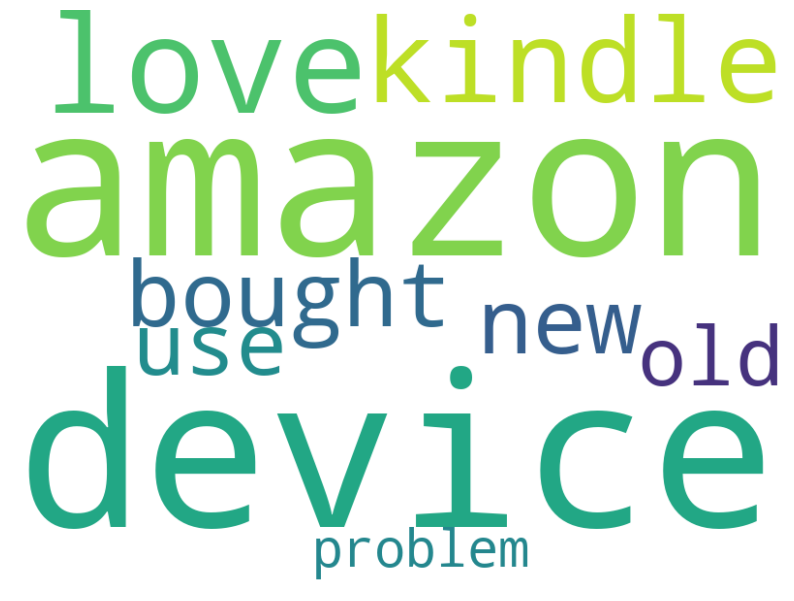

Word Cloud for Topic 1:


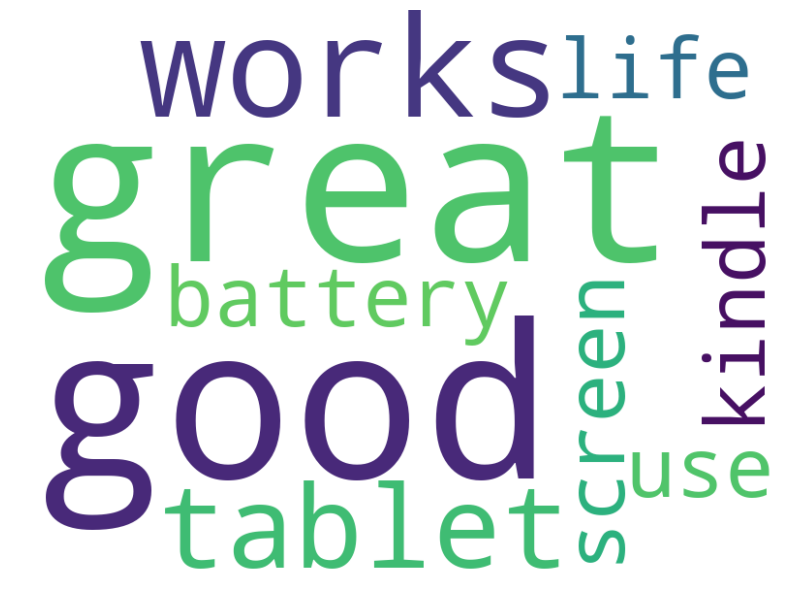

Word Cloud for Topic 2:


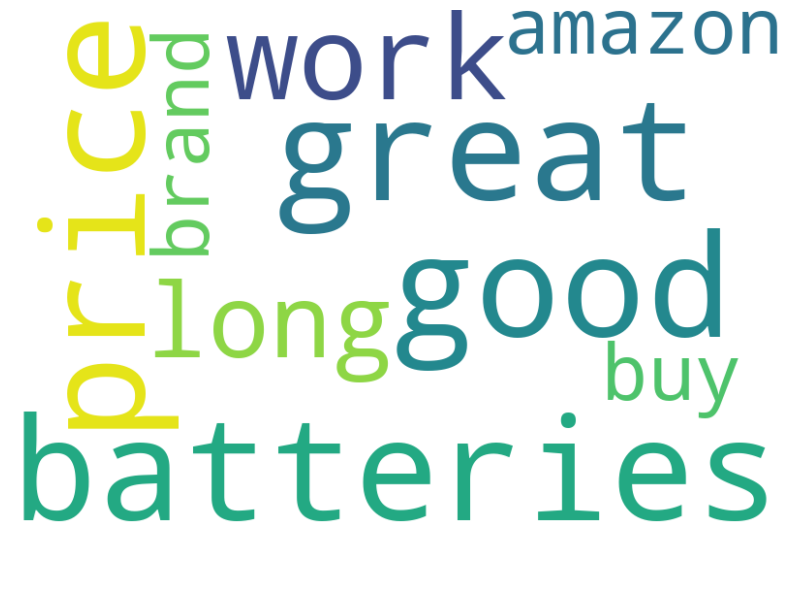

Word Cloud for Topic 3:


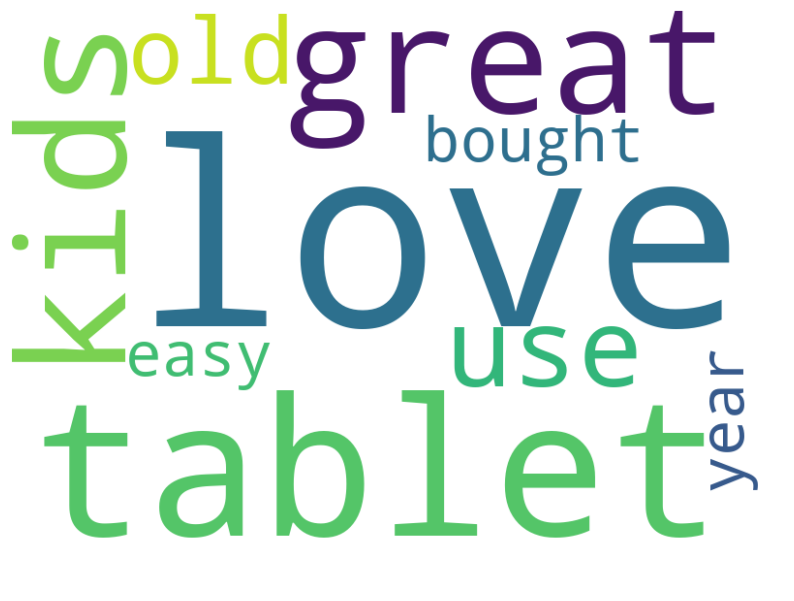

Word Cloud for Topic 4:


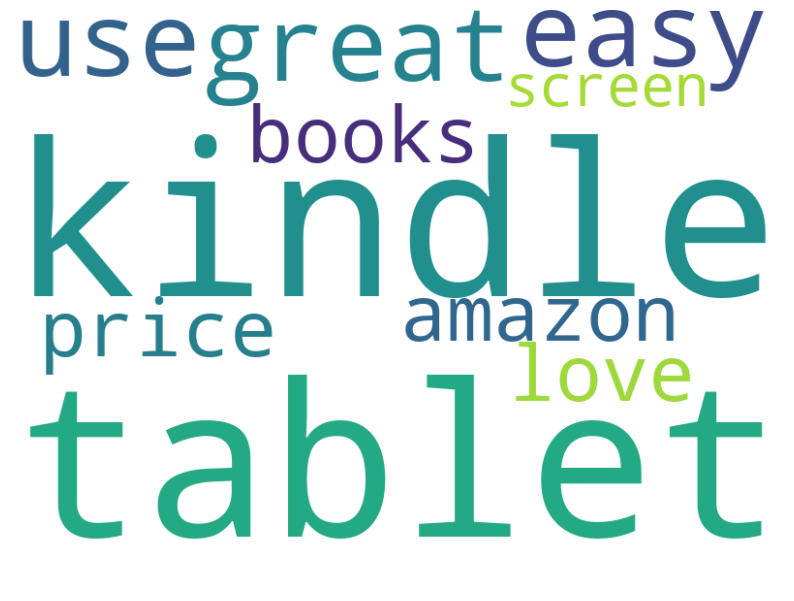

In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to plot word cloud
def plot_word_cloud(topic, feature_names, num_top_words):
    wordcloud = WordCloud(background_color='white',
                          width=800, height=600).generate(' '.join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Plot word clouds for each topic
num_top_words = 10
for topic_idx, topic in enumerate(lda.components_):
    print(f"Word Cloud for Topic {topic_idx}:")
    plot_word_cloud(topic, feature_names, num_top_words)


In [50]:
# Import nlkt and counter
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

# Def tokenizes the text
def tokenize_text(text):
    # Tokenize the text into sentences and words
    sentences = sent_tokenize(text)
    words = [word_tokenize(sentence.lower()) for sentence in sentences]
    return sentences, words

# Def calcualate work freq
def calculate_word_frequency(words):
    # Calculate word frequency
    word_freq = Counter()
    for sentence in words:
        word_freq.update(sentence)
    return word_freq

# Def Score the sentences
def score_sentences(sentences, word_freq):
    # Score sentences based on word frequency
    sentence_scores = {}
    for sentence in sentences:
        for word in word_tokenize(sentence.lower()):
            if word in word_freq:
                if len(sentence.split(' ')) < 30:  # Limiting sentence length to 30 words for better summary
                    if sentence not in sentence_scores:
                        sentence_scores[sentence] = word_freq[word]
                    else:
                        sentence_scores[sentence] += word_freq[word]
    return sentence_scores

# Def Summarize text main
def summarize_text(text, num_sentences=3):
    # Tokenize text
    sentences, words = tokenize_text(text)
    print("\nTokenized Sentences:")
    for idx, sentence in enumerate(sentences):
        print(f"Sentence {idx+1}: {sentence}")
    print("\nTokenized Words:")
    for idx, sentence_words in enumerate(words):
        print(f"Sentence {idx+1}: {sentence_words}")

    # Calculate word frequency
    word_freq = calculate_word_frequency(words)
    print("\nWord Frequency:")
    print(word_freq)

    # Score sentences
    sentence_scores = score_sentences(sentences, word_freq)
    print("\nSentence Scores:")
    for sentence, score in sentence_scores.items():
        print(f"Sentence: {sentence} Score: {score}")

    # Sort sentences by score
    sorted_sentences = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)
    print("\nSorted Sentences:")
    for idx, (sentence, score) in enumerate(sorted_sentences):
        print(f"Sentence {idx+1}: {sentence} Score: {score}")

    # Select top sentences
    summary_sentences = sorted_sentences[:num_sentences]
    print("\nSelected Sentences for Summary:")
    for idx, (sentence, score) in enumerate(summary_sentences):
        print(f"Sentence {idx+1}: {sentence} Score: {score}")

    # Join selected sentences to form summary
    summary = ' '.join(sentence[0] for sentence in summary_sentences)
    return summary

# Original text
original_text = "I recently purchased the XYZ Wireless Earbuds, and I must say, they exceeded my expectations in every way possible. First off, the sound quality is incredible. The bass is deep, the mids are crisp, and the highs are clear without being too harsh. Whether I'm listening to my favorite music or taking calls, the audio experience is top-notch."

# Perform extractive text summarization
summary = summarize_text(original_text)

# Print the summary
print("\nOriginal Text:")
print(original_text)
print("\nSummary:")
print(summary)



Tokenized Sentences:
Sentence 1: I recently purchased the XYZ Wireless Earbuds, and I must say, they exceeded my expectations in every way possible.
Sentence 2: First off, the sound quality is incredible.
Sentence 3: The bass is deep, the mids are crisp, and the highs are clear without being too harsh.
Sentence 4: Whether I'm listening to my favorite music or taking calls, the audio experience is top-notch.

Tokenized Words:
Sentence 1: ['i', 'recently', 'purchased', 'the', 'xyz', 'wireless', 'earbuds', ',', 'and', 'i', 'must', 'say', ',', 'they', 'exceeded', 'my', 'expectations', 'in', 'every', 'way', 'possible', '.']
Sentence 2: ['first', 'off', ',', 'the', 'sound', 'quality', 'is', 'incredible', '.']
Sentence 3: ['the', 'bass', 'is', 'deep', ',', 'the', 'mids', 'are', 'crisp', ',', 'and', 'the', 'highs', 'are', 'clear', 'without', 'being', 'too', 'harsh', '.']
Sentence 4: ['whether', 'i', "'m", 'listening', 'to', 'my', 'favorite', 'music', 'or', 'taking', 'calls', ',', 'the', 'audi

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maxpr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


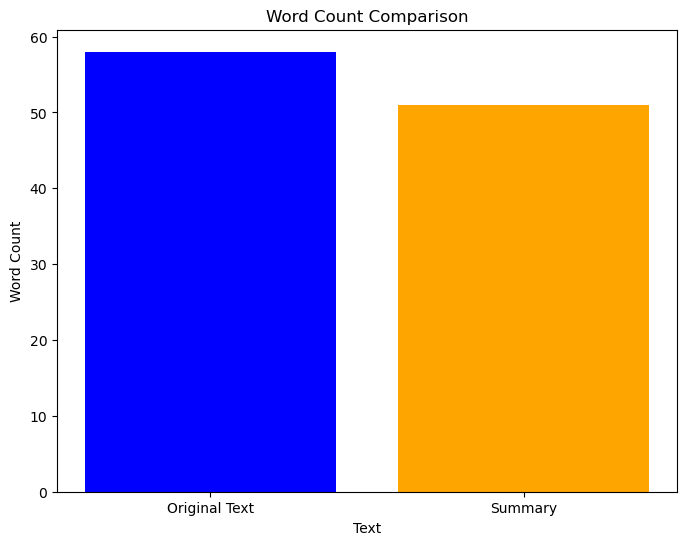

In [51]:
# Import matplot
import matplotlib.pyplot as plt

# Def making the plot
def visualize_word_count(original_text, summary):
    # Calculate word counts
    original_word_count = len(original_text.split())
    summary_word_count = len(summary.split())

    # Plot bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(['Original Text', 'Summary'], [original_word_count, summary_word_count], color=['blue', 'orange'])
    plt.xlabel('Text')
    plt.ylabel('Word Count')
    plt.title('Word Count Comparison')
    plt.show()


# Visualize word count change
visualize_word_count(original_text, summary)


In [32]:
# Import nltk
import nltk
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

# Tokenize text
def tokenize_text(text):
    return sent_tokenize(text)

# Summarize the reviws 
def summarize_review(review_text):
    # Apply your summarization technique (e.g., extractive summarization)
    sentences = tokenize_text(review_text)
    if len(sentences) > 0:
        return sentences[0]
    else:
        return ""  # Return an empty string if the review has no sentences

# Apply summarization to each review in the dataset
summaries = [summarize_review(review) for review in reviews]

# Display the first few summaries
for idx, summary in enumerate(summaries[:15]):
    print(f"Summary {idx+1}: {summary}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maxpr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Summary 1: Bulk is always the less expensive way to go for products like these
Summary 2: Well they are not Duracell but for the price i am happy.
Summary 3: Seem to work as well as name brand batteries at a much better price
Summary 4: These batteries are very long lasting the price is great.
Summary 5: Bought a lot of batteries for Christmas and the AmazonBasics Cell have been good.
Summary 6: ive not had any problame with these batteries have ordered them in the past been very pleased.
Summary 7: Well if you are looking for cheap non-rechargeable batteries that last quite a while then these are perfect.
Summary 8: AmazonBasics AA AAA batteries have done well by me appear to have a good shelf life.
Summary 9: I find amazon basics batteries to be equal if not superior to name brand ones.
Summary 10: Use it for my fish tank's light at night and works great, I love how you can easily switch it off and on if you want it on while guests are there.
Summary 11: just got em so I can't really

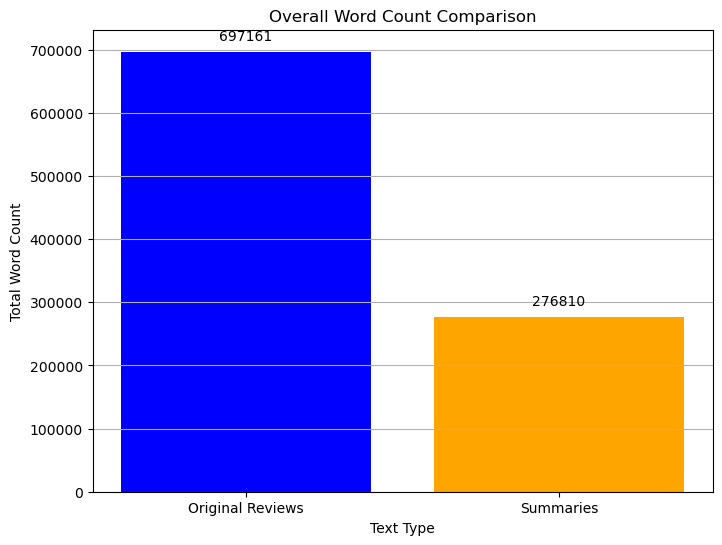

In [35]:
# Import matplot
import matplotlib.pyplot as plt

# Calculate overall word counts
original_total_word_count = sum(len(review.split()) for review in reviews)
summary_total_word_count = sum(len(summary.split()) for summary in summaries)

# Plot overall word counts
plt.figure(figsize=(8, 6))
plt.bar(['Original Reviews', 'Summaries'], [original_total_word_count, summary_total_word_count], color=['blue', 'orange'])
plt.xlabel('Text Type')
plt.ylabel('Total Word Count')
plt.title('Overall Word Count Comparison')

# Add labels with exact numbers
for i, v in enumerate([original_total_word_count, summary_total_word_count]):
    plt.text(i, v + 0.02 * max(original_total_word_count, summary_total_word_count), str(v), ha='center', va='bottom')

plt.grid(axis='y')
plt.show()


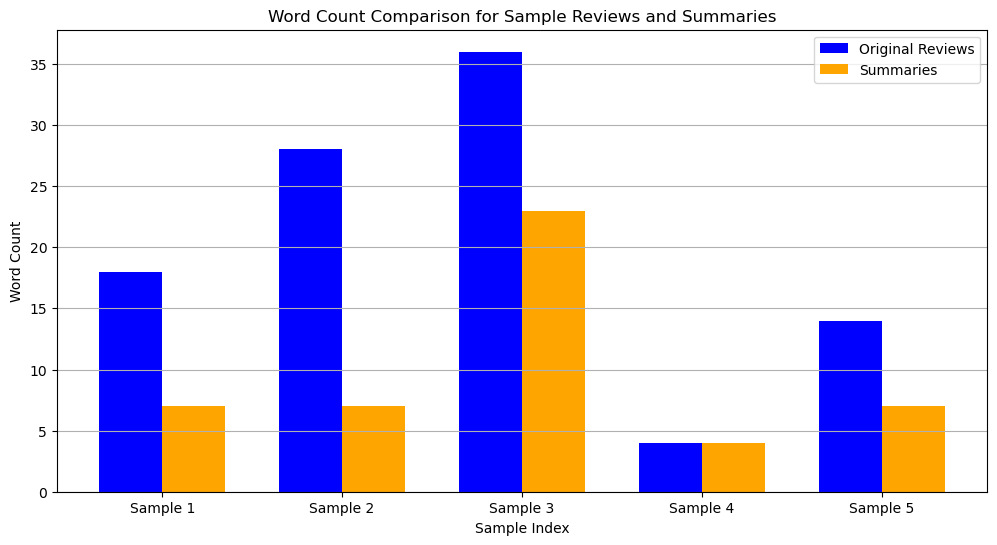

In [36]:
# Import numpy and matplot
import matplotlib.pyplot as plt
import numpy as np

# Choose a few reviews and their corresponding summaries for comparison
num_samples = 5
sample_indices = np.random.choice(len(reviews), num_samples, replace=False)

# Extract the chosen reviews and summaries
sample_reviews = [reviews[i] for i in sample_indices]
sample_summaries = [summaries[i] for i in sample_indices]

# Calculate word counts for the samples
sample_review_word_counts = [len(review.split()) for review in sample_reviews]
sample_summary_word_counts = [len(summary.split()) for summary in sample_summaries]

# Plot side-by-side bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(num_samples)

plt.bar(index, sample_review_word_counts, bar_width, label='Original Reviews', color='blue')
plt.bar(index + bar_width, sample_summary_word_counts, bar_width, label='Summaries', color='orange')

plt.xlabel('Sample Index')
plt.ylabel('Word Count')
plt.title('Word Count Comparison for Sample Reviews and Summaries')
plt.xticks(index + bar_width / 2, [f"Sample {i+1}" for i in range(num_samples)])
plt.legend()
plt.grid(axis='y')
plt.show()


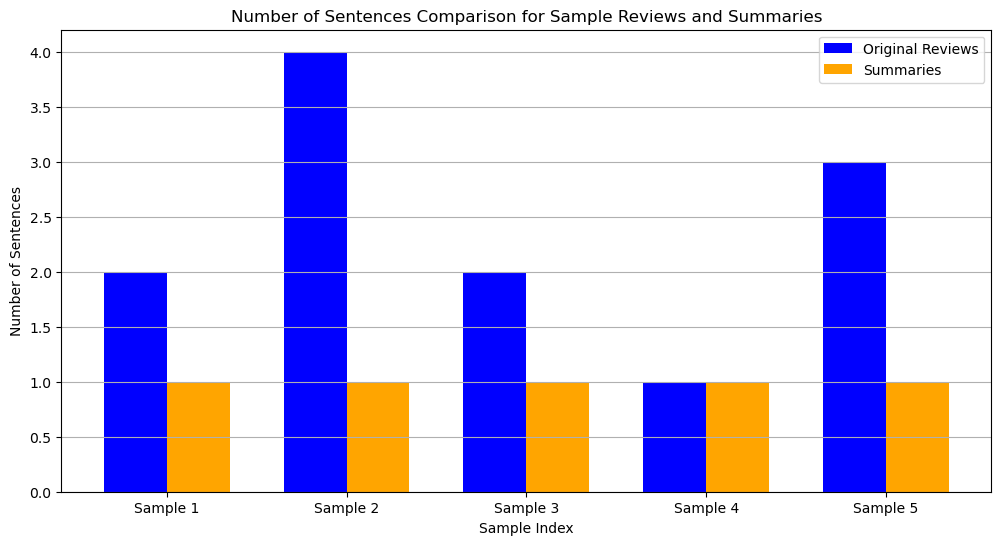

In [45]:
# IMmport pandas
import pandas as pd

# Load your dataset 
df = pd.read_csv('Dataset.csv')

# Function to check for excessive capitalization
def has_excessive_capitalization(text):
    return sum(1 for char in text if char.isupper()) > len(text) * 0.5

# Apply rule-based filtering to identify potential spam reviews
df['potential_spam'] = df['reviews.text'].apply(has_excessive_capitalization)

# Display potential spam reviews
potential_spam_reviews = df[df['potential_spam'] == True]['reviews.text']
print("Potential Spam Reviews:")
for review in potential_spam_reviews:
    print(review)

# Count the number of reviews flagged as spam
num_spam_reviews = df['potential_spam'].sum()

# Count the number of reviews that weren't flagged as spam
num_non_spam_reviews = len(df) - num_spam_reviews

print("\nNumber of Reviews Flagged as Spam:", num_spam_reviews)
print("Number of Reviews That Weren't Flagged as Spam:", num_non_spam_reviews)

# remvoe from dataset to exclude spam if wanted

Potential Spam Reviews:
HAVE NOT HAD CHANCE TO USE ALL OF THEM BUT HOPEFULLY ALL OF THEM WILL REMAIN IN GOOD ORDER FOR A REASONABLE AMOUNT OF TIME MEANING A FEW YEARS OUT.
GOT THE 48 PACK, I USEDD THEM UP FASTER THAN I THOUGHT I WOULD!!,SO IM ORDERING MORE !! SO IM ORDERING MORE NOW
LOVE THESE BATTERIES! BETTER THAN DURACELL AND SAVES ME MONEY! THANK YOU FOR A GREAT PRODUCT AMAZON!
NICE PRODUCT
A+A+A+A+A+ FAST DELIVERY JUST AS DESCRIBE
GOOD ALKALINE BATTERIES. AREN'T ALL ALKALINE THE SAME ADVERTISING STEERS SOME PEOPLE.
OK
GREAT!
HOPE THEY WORK!
AOK
AOK-AS ORDERED
GREAT VALUE
BUY THE BEST OR SUFFER LIKE THE REST
EXCELLENT BATTERIES FOR THE PRICE.
WORK GREAT
EXCELLENT PRODUCT
EXCELLENT PRODUCT,GREAT QUALITY AND VALUE
A GREAT BARGAIN ! ! !
AAA+
ALWAYS GOOD
AS EXPECTED
ASDFGHJ
BATTERIES! CHEAP!
BUENOS PRODUCTOS
CHEAP
COMES IN AWESOME AND SAFE PACKAGE AND JUST DOES THE JOD :)
EXCELLENT
EXCELLENT
EXCEPTIONAL.
F
FINE BATTERIES AT A WONDERFUL PRICE
FOR THE PRICE....THEY ARE OK
GOOD
GOOD BATTE